In [1]:
import cv2
import os
from  matplotlib import pyplot as plt
import numpy as np

In [2]:
def readImg(dir_name):
    img_list = [] # 文档内所有图像
    for filename in os.listdir(r"./"+dir_name):
        img = cv2.imread(dir_name + "/" + filename)
        img_list.append(img)
    return img_list

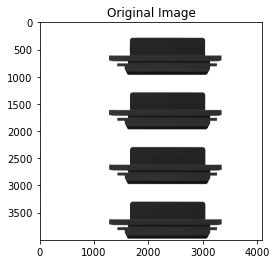

In [3]:
img_list = readImg('img')
img = img_list[0] # 14raw.jpg

plt.title("Original Image")
plt.imshow(img)

# len(img_list) = 4
# img_list[0].shape = (4000, 4096, 3)

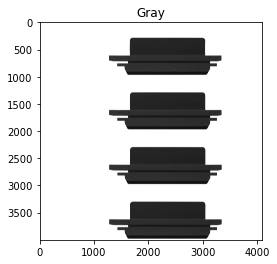

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 灰度图
plt.title("Gray")
plt.imshow(img_gray,cmap="gray")
# img_size = img_gray.shape

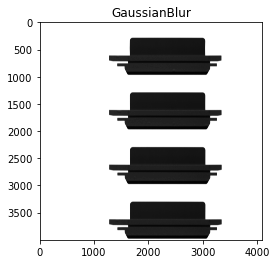

In [5]:
# 对灰度图做高斯模糊
blur = cv2.GaussianBlur(img_gray, (3,3), 0)

plt.title("GaussianBlur")
plt.imshow(blur,cmap="gray")

True

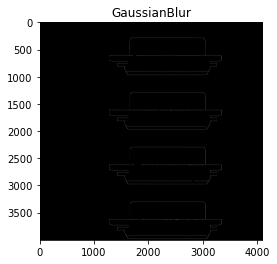

In [6]:
# Canny边缘检测提取边缘轮廓
edges = cv2.Canny(blur, 30, 65)
# cv2.medianBlur(img01,5)
edges = cv2.GaussianBlur(edges,(5,5),0)
plt.title("GaussianBlur")
plt.imshow(edges,cmap="gray")
cv2.imwrite("output/1.jpg", edges)

In [7]:
# 霍夫变换寻找直线
lines = cv2.HoughLines(edges, 0.01, np.pi/180, 150) # 极坐标形式

In [8]:
# 定义过滤器
'''def filter(lines, angle_o, angle_f):
    line_array = []
    if angle_o<0:
        angle_o=angle_o+360
        for line in lines:
            theta=line[0,1]
            if theta>np.pi/180*angle_o or theta<np.pi/180*angle_f:
                line_array.append(line)
    else:
        for line in lines:
            theta=line[0,1]
            if theta>np.pi/180*angle_o and theta<np.pi/180*angle_f:
                line_array.append(line)
    return line_array'''

'def filter(lines, angle_o, angle_f):\n    line_array = []\n    if angle_o<0:\n        angle_o=angle_o+360\n        for line in lines:\n            theta=line[0,1]\n            if theta>np.pi/180*angle_o or theta<np.pi/180*angle_f:\n                line_array.append(line)\n    else:\n        for line in lines:\n            theta=line[0,1]\n            if theta>np.pi/180*angle_o and theta<np.pi/180*angle_f:\n                line_array.append(line)\n    return line_array'

In [8]:
len(lines)

239

In [11]:
# 横线
line_array=[]
for line in lines:
    theta=line[0,1]
    if theta>np.pi/180*80 and theta<np.pi/180*100:
        line_array.append(line)

In [10]:
# 竖线
line_array=[]
for line in lines:
    theta=line[0,1]
    if theta>np.pi/180*350 or theta<np.pi/180*10:
        line_array.append(line)
print(len(line_array))

64


In [12]:
# 将line_array中的直线按r的顺序由小到大排序

lines_f = [] # 最终的排序结果
r_array = [] # r数组
n = [] #r数组的排序
line_array = np.array(line_array)
for line in line_array:
    r_array.append(line[0,0])
n = np.argsort(r_array)
for i in n:
    lines_f.append(line_array[i])
#print(lines_f)

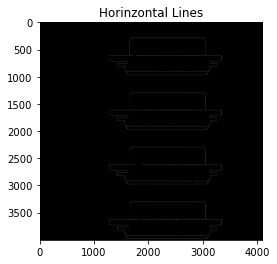

In [13]:
# 横线
# 将筛选出来的直线依次画出来
# 根据公式 r = x*cos(theta)+y*sin(theta)
y_list = []
dicts = {} # 记录直线
Horinzontal_Lines = edges.copy()
for line in lines_f:
    theta=line[0,1]
    r=line[0,0]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    x0 = 0
    y0 = int(r / sin_theta)
    y_list.append(int(round(r)))
    # edges.shape[1]为edges图像的x轴像素点的数量
    x1 = edges.shape[1]
    y1 = int((r - x1*cos_theta)/sin_theta)
    dicts[y0] = [x0, x1, y1]
    Horinzontal_Lines = cv2.line(Horinzontal_Lines, (x0, y0), (x1, y1), (255, 255, 255), 3)
cv2.imwrite("output/11.jpg",Horinzontal_Lines)
plt.title("Horinzontal Lines")
plt.imshow(edges,cmap="gray")

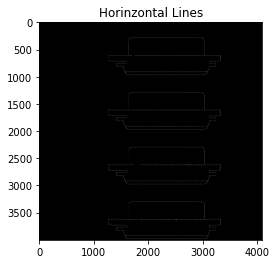

In [14]:
# 竖线
# 将筛选出来的直线依次画出来
# 根据公式 r = x*cos(theta)+y*sin(theta)
y_list = []
dicts = {} # 记录直线
Horinzontal_Lines = edges.copy()
for line in lines_f:
    theta=line[0,1]
    r=line[0,0]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    y0 = 0
    x0 = int(r / cos_theta)
    y_list.append(int(round(r)))
    # edges.shape[1]为edges图像的x轴像素点的数量
    y1 = edges.shape[0]
    x1 = int((r - y1*sin_theta)/cos_theta)
    dicts[x0] = [y0, x1, y1]
    Horinzontal_Lines = cv2.line(Horinzontal_Lines, (x0, y0), (x1, y1), (255, 255, 255), 1)
cv2.imwrite("output/11.jpg",Horinzontal_Lines)
plt.title("Horinzontal Lines")
plt.imshow(edges,cmap="gray")

In [14]:
print(y_list)

[286, 287, 288, 289, 290, 291, 612, 613, 614, 615, 616, 617, 618, 619, 719, 720, 721, 722, 723, 756, 757, 758, 759, 760, 811, 812, 813, 814, 815, 908, 909, 910, 911, 912, 913, 914, 967, 968, 969, 970, 971, 1288, 1289, 1290, 1291, 1292, 1293, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1718, 1719, 1720, 1721, 1722, 1723, 1756, 1757, 1758, 1759, 1760, 1811, 1812, 1813, 1814, 1815, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1967, 1968, 1969, 1970, 1971, 2292, 2293, 2294, 2295, 2296, 2297, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2722, 2723, 2724, 2725, 2726, 2727, 2760, 2761, 2762, 2763, 2764, 2815, 2816, 2817, 2818, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2970, 2971, 2972, 2973, 2974, 2975, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3724, 3725, 3726, 3727, 3728, 3729, 3762, 3763, 3764, 3765, 3766, 3816, 3817, 3818, 3819, 3820, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3973, 3974, 3975, 39

In [15]:
print(dicts)

{285: [0, 4096, 285], 286: [0, 4096, 286], 287: [0, 4096, 287], 288: [0, 4096, 288], 289: [0, 4096, 289], 290: [0, 4096, 290], 611: [0, 4096, 611], 612: [0, 4096, 612], 613: [0, 4096, 613], 614: [0, 4096, 614], 615: [0, 4096, 615], 616: [0, 4096, 616], 617: [0, 4096, 617], 618: [0, 4096, 618], 718: [0, 4096, 718], 719: [0, 4096, 719], 720: [0, 4096, 720], 721: [0, 4096, 721], 722: [0, 4096, 722], 755: [0, 4096, 755], 756: [0, 4096, 756], 757: [0, 4096, 757], 758: [0, 4096, 758], 759: [0, 4096, 759], 810: [0, 4096, 810], 811: [0, 4096, 811], 812: [0, 4096, 812], 813: [0, 4096, 813], 814: [0, 4096, 814], 907: [0, 4096, 907], 908: [0, 4096, 908], 909: [0, 4096, 909], 910: [0, 4096, 910], 911: [0, 4096, 911], 912: [0, 4096, 912], 913: [0, 4096, 913], 966: [0, 4096, 966], 967: [0, 4096, 967], 968: [0, 4096, 968], 969: [0, 4096, 969], 970: [0, 4096, 970], 1287: [0, 4096, 1287], 1288: [0, 4096, 1288], 1289: [0, 4096, 1289], 1290: [0, 4096, 1290], 1291: [0, 4096, 1291], 1292: [0, 4096, 1292], 

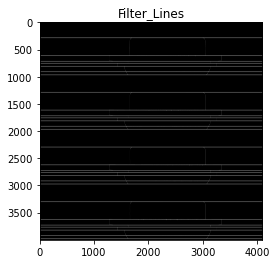

In [17]:
# y_list = [287, 288, 613, 614, 718, 719, 757, 811, 967,
# 1289, 1290, 1612, 1613, 1614, 1718, 1719, 1757, 1811, 1967, 1968,
# 2292, 2293, 2294, 2616, 2617, 2618, 2722, 2723, 2724, 2761, 2814, 2815, 2971,
# 3294, 3295, 3296, 3618, 3619, 3620, 3724, 3725, 3762, 3763, 3817, 3973, 3974]
# 即边缘中有多条很贴近的直线

# 去除贴近直线后重新描线

y_list_filter = [] # 多条贴近直线取均值
# 传入边缘和直线横坐标
def Line_Filter(img, y):
    i = 0
    while(i < len(y_list)):
        current_list = []
        current_list.append(y_list[i])
        while(i < len(y_list) - 1 and y_list[i+1] - y_list[i] <= 1):
            current_list.append(y_list[i+1])
            i = i + 1
        y_list_filter.append(sum(current_list)/len(current_list))
        i = i + 1
        
    Filter_Lines = img.copy()
    for y in y_list_filter:
        y = int(y)
        axis = dicts[y]
        Filter_Lines = cv2.line(Filter_Lines, (axis[0],y), (axis[1],axis[2]), (255, 255, 255), 3)
    return Filter_Lines

Filter_Lines = Line_Filter(edges, y_list)
cv2.imwrite("output/2.jpg", Filter_Lines)
plt.title("Filter_Lines")
plt.imshow(Filter_Lines,cmap="gray")

In [18]:
def distance(y_list_fileter, num1, num2, k):
    k = k # 0号工件
    current_object = y_list_filter[7*k:7*k+7]
    if num1>num2:
        num1, num2 = num2, num1
    return (current_object[num2]-current_object[num1])*0.027

In [19]:
res = distance(y_list_filter, 2, 1, 0)

In [20]:
res

2.8485